In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 동적 평형(dynamic equilibrium)

동적 평형은 가역반응에서 정반응과 역반응의 반응 속도가 같아져 계속 반응하고 있으나 반응이 정지한 것처럼 보이는 상태이다.

이 동적평형의 대표적 예는 다음이 있다.

* 상평형(phase equilibrium)
* 용해평형(solubility equilibrium)
* 화학평형(chemical equilibrium)
* ...

간단한 동적평형의 경우 쉽게 연립 상미분 방정식을 세울 수 있고 그 해또한 쉽게 구할 수 있는데 이를 보고자 한다.

# 상평형

## 구성 조건

* $\text{X}\text{(l)}\longleftrightarrow\text{X}\text{(g)}$는 가역반응이다.

* $x,\,y$는 각각 $\text{X(l)},\,\text{X(g)}$의 양을 의미한다.

* $\text{X(l)}\longrightarrow \text{X(g)}$(증발, evaporation)의 속도, $v_e$는 온도와 여러 변수가 혼재된 변수 $T$에 따라 변하며 $T$가 일정하면 정반응 속도도 항상 일정하다. 구체적으로 $v_e=T$

* $\text{X(l)}\longleftarrow\text{X(g)}$(응축, condensation)의 속도, $v_c$는 일정하지 않고 변하며, 정반응 속도에 시간이 지날수록 수렴한다.
구체적으로 역반응 속도, $v_c$는 임의의 상수 $k$에 대하여 $v_c=ky$를 만족한다.

* $x$, $y$는 다음 식을 만족한다.
$$\begin{cases}\displaystyle\frac{dx}{dt}&=v_c-v_e&=ky-T\\\displaystyle\frac{dy}{dt}&=v_e-v_c&=T-ky\end{cases}$$

## 상평형 예제 1

* 초기조건
    + $\text{X(l)}: 100$
    + $\text{X(g)}: 0$
    + $T=1$
    + $k=0.05$

In [2]:
t, dt = np.linspace(0, 100, 100000, retstep= True)
x = np.zeros_like(t) # liquid
y = np.zeros_like(t) # gas
v_c = np.zeros_like(t) # condensation speed
v_e = np.zeros_like(t) # evaporation speed

T = 1 # evaporation constant 
k = 0.05 # condensation constant

# initial value
x[0] = 100
y[0] = 0
v_c[0] = 0
v_e[0] = T

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * (v_c[i] - v_e[i])
    y[i+1] = y[i] + dt * (v_e[i] - v_c[i])
    v_e[i+1] = T
    v_c[i+1] = k * y[i+1]


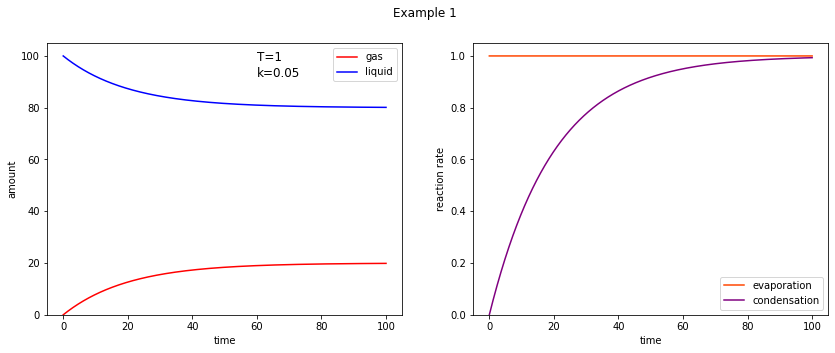

In [3]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle("Example 1")

ax[0].plot(t, y, label=r"gas", color='red')
ax[0].plot(t, x, label=r"liquid", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 100+5))

ax[1].plot(t, v_e, label='evaporation', color='orangered')
ax[1].plot(t, v_c, label='condensation', color='purple')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 1+0.05))

ax[0].text(60, 0.98*100, f"T={T}", size=12)
ax[0].text(60, 0.92*100, f"k={k}", size=12)

ax[1].legend()
ax[0].legend()

plt.show()

In [4]:
print(f"초기 물질량: {x[0]:.5f}, {y[0]:.5f} => {x[0]+y[0]:.5f}")
print(f"최종 물질량: {x[-1]:.5f}, {y[-1]:.5f} => {x[-1]+y[-1]:.5f}")

초기 물질량: 100.00000, 0.00000 => 100.00000
최종 물질량: 80.13474, 19.86526 => 100.00000


## 상평형 예제 2
* 초기조건
    + $\text{X(l)}: 100$
    + $\text{X(g)}: 0$
    + $T=1.5$
    + $k=0.025$

In [5]:
t, dt = np.linspace(0, 200, 200000, retstep= True)
x = np.zeros_like(t)
y = np.zeros_like(t)
v_c = np.zeros_like(t)
v_e = np.zeros_like(t)

T = 1.5
k = 0.025

x[0] = 100
y[0] = 0
v_c[0] = 0
v_e[0] = T

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * (v_c[i] - v_e[i])
    y[i+1] = y[i] + dt * (v_e[i] - v_c[i])
    v_e[i+1] = T
    v_c[i+1] = k * y[i+1]


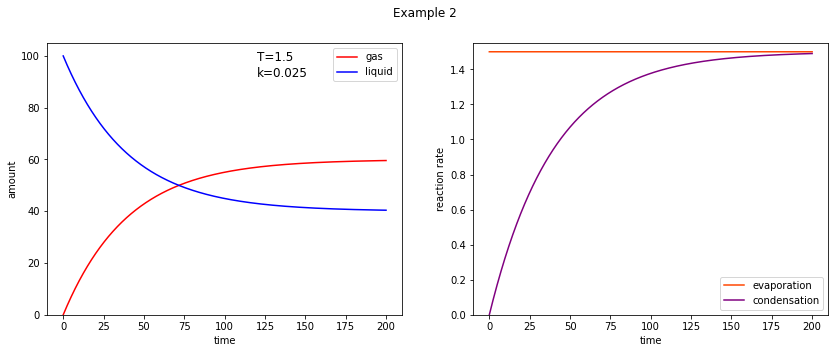

In [6]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle("Example 2")

ax[0].plot(t, y, label=r"gas", color='red')
ax[0].plot(t, x, label=r"liquid", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 100+5))

ax[1].plot(t, v_e, label='evaporation', color='orangered')
ax[1].plot(t, v_c, label='condensation', color='purple')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 1.5+0.05))

ax[0].text(120, 0.98*100, f"T={T}", size=12)
ax[0].text(120, 0.92*100, f"k={k}", size=12)

ax[1].legend()
ax[0].legend()

plt.show()

In [7]:
print(f"초기 물질량: {x[0]:.5f}, {y[0]:.5f} => {x[0]+y[0]:.5f}")
print(f"최종 물질량: {x[-1]:.5f}, {y[-1]:.5f} => {x[-1]+y[-1]:.5f}")

초기 물질량: 100.00000, 0.00000 => 100.00000
최종 물질량: 40.40425, 59.59575 => 100.00000


## 상평형 잘못된 예제

* 초기조건
    + $\text{X(l)}: 100$
    + $\text{X(g)}: 0$
    + $T=2$
    + $k=0.015$

In [8]:
t, dt = np.linspace(0, 300, 300000, retstep= True)
x = np.zeros_like(t)
y = np.zeros_like(t)
v_c = np.zeros_like(t)
v_e = np.zeros_like(t)

T = 2
k = 0.015

x[0] = 100
y[0] = 0
v_c[0] = 0
v_e[0] = T

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * (v_c[i] - v_e[i])
    y[i+1] = y[i] + dt * (v_e[i] - v_c[i])
    v_e[i+1] = T
    v_c[i+1] = k * y[i+1]


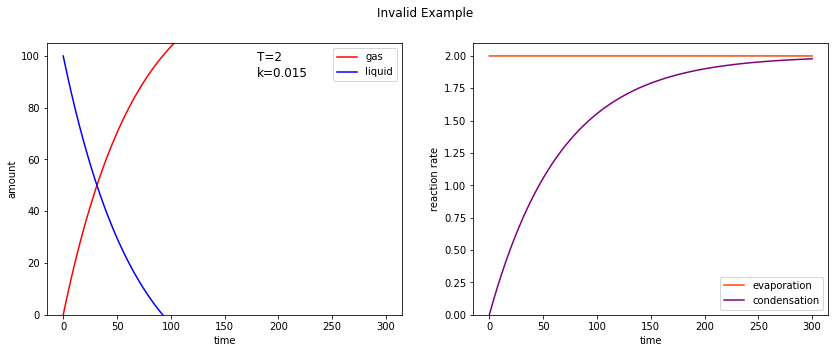

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle("Invalid Example")

ax[0].plot(t, y, label=r"gas", color='red')
ax[0].plot(t, x, label=r"liquid", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 100+5))

ax[1].plot(t, v_e, label='evaporation', color='orangered')
ax[1].plot(t, v_c, label='condensation', color='purple')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 2+0.1))

ax[0].text(180, 0.98*100, f"T={T}", size=12)
ax[0].text(180, 0.92*100, f"k={k}", size=12)

ax[1].legend()
ax[0].legend()

plt.show()

In [10]:
print(f"초기 물질량: {x[0]:.5f}, {y[0]:.5f} => {x[0]+y[0]:.5f}")
print(f"최종 물질량: {x[-1]:.5f}, {y[-1]:.5f} => {x[-1]+y[-1]:.5f}")

초기 물질량: 100.00000, 0.00000 => 100.00000
최종 물질량: -31.85218, 131.85218 => 100.00000


다음과 같이 상수나 양이 잘못된 경우 실제로는 나오지 않는 수치가 나온다는 점에서 한계가 있다.

## 결론

반응 속도 그래프가 책에서 보던것과 많이 닮아 있어 작성한 구성 조건에 나온 식은 유효한 것 같고.
또한 초기 물질과 반응 후 물질의 양이 동일한 것으로 보아 결론적으로 잘 작성된 식인 것 같다.

다만, 상수 등의 조건 때문에 실제로는 나올 수 없는 수치가 나온다는 점에서 상수를 적절히 조절할 필요가 있다.

# 용해평형

## 구성 조건

* $\text{X(s)}\longleftrightarrow\text{X(aq)}$는 가역반응이다.

* $x$, $y$는 각각 $\text{X(s)}$와 $\text{X(aq)}$의 양을 의미한다.

* $\text{X(s)}\longrightarrow\text{X(aq)}$(용해, dissolution)의 속도, $v_s$는 일정하다. 구체적으로 $v_s=k_s$

* $\text{X(s)}\longleftarrow\text{X(aq)}$(석출, eduction)의 속도, $v_e$는 변하며 용해 속도에 시간이 지날수록 수렴한다.
구체적으로 임의의 상수 $k_e$에 대하여 $v_e=k_e y$

* $x$, $y$는 다음 식을 만족한다. $$\begin{cases}\displaystyle\frac{dx}{dt}&=v_e-v_s&=k_e y-k_s\\\displaystyle\frac{dy}{dt}&=v_s-v_e&=k_s-k_ey\end{cases}$$

용해평형은 상평형과 똑같은 식 구조를 지닌다.

# 화학평형

## 구성 조건
* $2\text{A}\longleftrightarrow\text{A}_2$는 가역반응이다.

* $x$, $y$는 각각 $\text{A}$와 $\text{A}_2$의 양을 의미한다.

* $2\text{A}\longrightarrow\text{A}_2$의 속도, $v_1$는 $A$의 양에 비례한다. $$v_1=k_1 x$$

* $2\text{A}\longleftarrow\text{A}_2$의 속도, $v_2$는 $A_2$의 양에 비례한다. $$v_2 = k_2 y$$


* $x$, $y$는 다음 식을 만족한다.
$$\begin{cases}
\displaystyle
\frac{dx}{dt}&=2v_2-2v_1&=2k_2 y-2k_1 x\\\displaystyle\frac{dy}{dt}&=v_1-v_2&=k_1x-k_2y
\end{cases}$$

## 화학평형 예제 1

* 초기조건
    + $\text{A}: 1$
    + $\text{A}_2: 0$
    + $k_1=0.2$
    + $k_2=0.2$

In [11]:
t, dt = np.linspace(0, 10, 100000, retstep= True)
x = np.zeros_like(t)
y = np.zeros_like(t)
v1 = np.zeros_like(t)
v2 = np.zeros_like(t)

k1 = 0.2
k2 = 0.2

x[0] = 1
y[0] = 0
v1[0] = k1*x[0]
v2[0] = k2*y[0]

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * 2*(v2[i] - v1[i])
    y[i+1] = y[i] + dt * (v1[i] - v2[i])
    v1[i+1] = k1 * x[i+1]
    v2[i+1] = k2 * y[i+1]

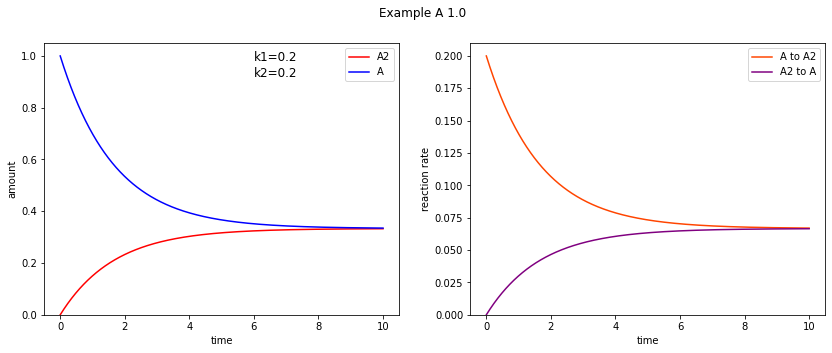

In [12]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle(f"Example A {x[0]}")

ax[0].plot(t, y, label=r"A2", color='red')
ax[0].plot(t, x, label=r"A", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 1+0.05))

ax[1].plot(t, v1, label='A to A2', color='orangered')
ax[1].plot(t, v2, label='A2 to A', color='purple')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 0.2+0.01))

ax[0].text(6, 0.98, f"k1={k1}", size=12)
ax[0].text(6, 0.92, f"k2={k2}", size=12)

ax[1].legend()
ax[0].legend()

plt.show()

In [13]:
print(f"초기 물질량: {x[0]:.5f}, {y[0]:.5f} => {x[0]+2*y[0]:.5f}")
print(f"최종 물질량: {x[-1]:.5f}, {y[-1]:.5f} => {x[-1]+2*y[-1]:.5f}")

초기 물질량: 1.00000, 0.00000 => 1.00000
최종 물질량: 0.33499, 0.33251 => 1.00000


## 화학평형 예제 2

* 초기조건
    + $\text{A}: 0$
    + $\text{A}_2: 0.5$
    + $k_1=0.2$
    + $k_2=0.2$

In [14]:
t, dt = np.linspace(0, 10, 100000, retstep= True)
x = np.zeros_like(t)
y = np.zeros_like(t)
v1 = np.zeros_like(t)
v2 = np.zeros_like(t)

k1 = 0.2
k2 = 0.2

x[0] = 0
y[0] = 0.5
v1[0] = k1*x[0]
v2[0] = k2*y[0]

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * 2*(v2[i] - v1[i])
    y[i+1] = y[i] + dt * (v1[i] - v2[i])
    v1[i+1] = k1 * x[i+1]
    v2[i+1] = k2 * y[i+1]

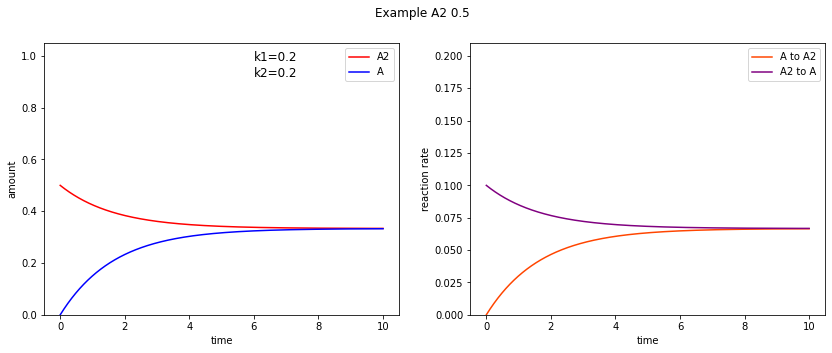

In [15]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle(f"Example A2 {y[0]}")

ax[0].plot(t, y, label=r"A2", color='red')
ax[0].plot(t, x, label=r"A", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 1+0.05))

ax[1].plot(t, v1, label='A to A2', color='orangered')
ax[1].plot(t, v2, label='A2 to A', color='purple')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 0.2+0.01))

ax[0].text(6, 0.98, f"k1={k1}", size=12)
ax[0].text(6, 0.92, f"k2={k2}", size=12)

ax[1].legend()
ax[0].legend()

plt.show()

In [16]:
print(f"초기 물질량: {x[0]:.5f}, {y[0]:.5f} => {x[0]+2*y[0]:.5f}")
print(f"최종 물질량: {x[-1]:.5f}, {y[-1]:.5f} => {x[-1]+2*y[-1]:.5f}")

초기 물질량: 0.00000, 0.50000 => 1.00000
최종 물질량: 0.33251, 0.33375 => 1.00000


## 화학평형 예제 3

* 초기조건
    + $\text{A}: 0.5$
    + $\text{A}_2: 0.25$
    + $k_1=0.2$
    + $k_2=0.2$

In [17]:
t, dt = np.linspace(0, 10, 100000, retstep= True)
x = np.zeros_like(t)
y = np.zeros_like(t)
v1 = np.zeros_like(t)
v2 = np.zeros_like(t)

k1 = 0.2
k2 = 0.2

x[0] = 0.5
y[0] = 0.25
v1[0] = k1*x[0]
v2[0] = k2*y[0]

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * 2*(v2[i] - v1[i])
    y[i+1] = y[i] + dt * (v1[i] - v2[i])
    v1[i+1] = k1 * x[i+1]
    v2[i+1] = k2 * y[i+1]

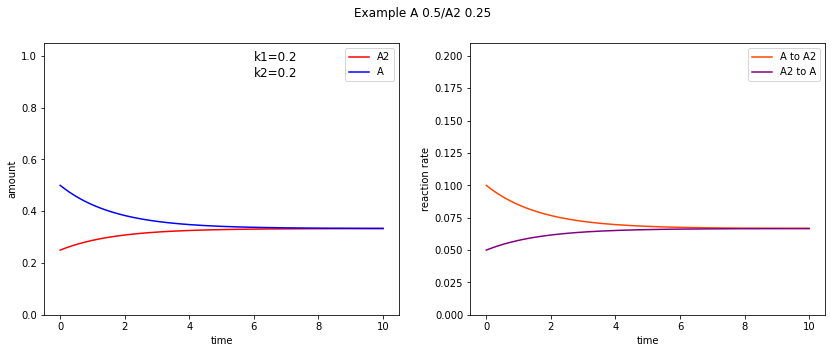

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle(f"Example A {x[0]}/A2 {y[0]}")

ax[0].plot(t, y, label=r"A2", color='red')
ax[0].plot(t, x, label=r"A", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 1+0.05))

ax[1].plot(t, v1, label='A to A2', color='orangered')
ax[1].plot(t, v2, label='A2 to A', color='purple')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 0.2+0.01))

ax[0].text(6, 0.98, f"k1={k1}", size=12)
ax[0].text(6, 0.92, f"k2={k2}", size=12)

ax[1].legend()
ax[0].legend()

plt.show()

In [19]:
print(f"초기 물질량: {x[0]:.5f}, {y[0]:.5f} => {x[0]+2*y[0]:.5f}")
print(f"최종 물질량: {x[-1]:.5f}, {y[-1]:.5f} => {x[-1]+2*y[-1]:.5f}")

초기 물질량: 0.50000, 0.25000 => 1.00000
최종 물질량: 0.33375, 0.33313 => 1.00000


## 결론

세가지 예제 모두 초기 $A$의 양이 일정하다면 동일한 동적평형 상태로 수렴한다. (단, $k_i$도 동일해야함)

이 식도 책에서 보던 화학평형 상태를 잘 반영하고 물질량도 불변하므로 반응이 잘 구현된 식인 것 같다.

# 동적 평형 일반화

## 구성 조건
* $a\text{A}\longleftrightarrow b\text{B}$는 가역반응이다.

* $x$, $y$는 각각 $\text{A}$와 $\text{B}$의 양을 의미한다.

* $a\text{A}\longrightarrow b\text{B}$의 속도, $v_1$는 $A$의 양에 비례한다. $$v_1=k_1 x$$

* $a\text{A}\longleftarrow b\text{B}$의 속도, $v_2$는 $A_2$의 양에 비례한다. $$v_2 = k_2 y$$


* $x$, $y$는 다음 식을 만족한다.
$$\begin{cases}
\displaystyle
\frac{dx}{dt}&=a v_2-a v_1&=ak_2 y-ak_1 x\\\displaystyle\frac{dy}{dt}&=bv_1-bv_2&=bk_1x-bk_2y
\end{cases}$$

## 일반화 예제 1

$$3\text{A}\longleftrightarrow 1\text{B}$$

* 초기조건
    + $\text{A}: 1$
    + $\text{B}: 0$
    + $k_1=0.2$
    + $k_2=0.2$

In [31]:
t, dt = np.linspace(0, 10, 100000, retstep= True)
x = np.zeros_like(t)
y = np.zeros_like(t)
v1 = np.zeros_like(t)
v2 = np.zeros_like(t)

k1 = 0.2
k2 = 0.2

a=3
b=1

x[0] = 1
y[0] = 0
v1[0] = k1*x[0]
v2[0] = k2*y[0]

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * a*(v2[i] - v1[i])
    y[i+1] = y[i] + dt * b*(v1[i] - v2[i])
    v1[i+1] = k1 * x[i+1]
    v2[i+1] = k2 * y[i+1]

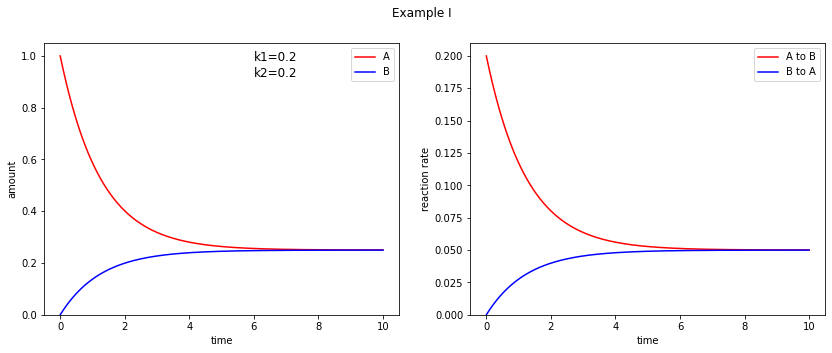

In [32]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle(f"Example I")

ax[0].plot(t, x, label=r"A", color='red')
ax[0].plot(t, y, label=r"B", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 1+0.05))

ax[1].plot(t, v1, label='A to B', color='red')
ax[1].plot(t, v2, label='B to A', color='blue')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 0.2+0.01))

ax[0].text(6, 0.98, f"k1={k1}", size=12)
ax[0].text(6, 0.92, f"k2={k2}", size=12)

ax[1].legend()
ax[0].legend()

plt.show()

In [33]:
print(f"초기 물질량: {x[0]:.5f}, {y[0]:.5f} => {b*x[0]+a*y[0]:.5f}")
print(f"최종 물질량: {x[-1]:.5f}, {y[-1]:.5f} => {b*x[-1]+a*y[-1]:.5f}")

초기 물질량: 1.00000, 0.00000 => 1.00000
최종 물질량: 0.25025, 0.24992 => 1.00000


## 일반화 예제 2

$$3\text{A}\longleftrightarrow 2\text{B}$$

* 초기조건
    + $\text{A}: 0$
    + $\text{B}: 1$
    + $k_1=0.2$
    + $k_2=0.2$

In [36]:
t, dt = np.linspace(0, 10, 100000, retstep= True)
x = np.zeros_like(t)
y = np.zeros_like(t)
v1 = np.zeros_like(t)
v2 = np.zeros_like(t)

k1 = 0.2
k2 = 0.2

a=3
b=2

x[0] = 0
y[0] = 1
v1[0] = k1*x[0]
v2[0] = k2*y[0]

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * a*(v2[i] - v1[i])
    y[i+1] = y[i] + dt * b*(v1[i] - v2[i])
    v1[i+1] = k1 * x[i+1]
    v2[i+1] = k2 * y[i+1]

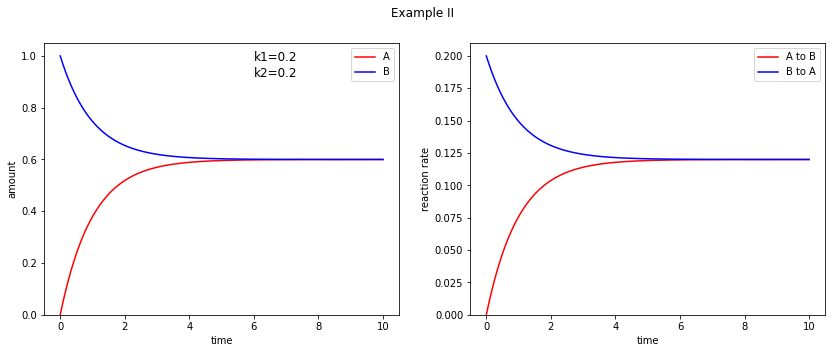

In [37]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle(f"Example II")

ax[0].plot(t, x, label=r"A", color='red')
ax[0].plot(t, y, label=r"B", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 1+0.05))

ax[1].plot(t, v1, label='A to B', color='red')
ax[1].plot(t, v2, label='B to A', color='blue')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 0.2+0.01))

ax[0].text(6, 0.98, f"k1={k1}", size=12)
ax[0].text(6, 0.92, f"k2={k2}", size=12)

ax[1].legend()
ax[0].legend()

plt.show()

In [39]:
print(f"초기 물질량: {x[0]:.5f}, {y[0]:.5f} => {b*x[0]+a*y[0]:.5f}")
print(f"최종 물질량: {x[-1]:.5f}, {y[-1]:.5f} => {b*x[-1]+a*y[-1]:.5f}")

초기 물질량: 0.00000, 1.00000 => 3.00000
최종 물질량: 0.59997, 0.60002 => 3.00000


## 결론

확언할 수는 없지만 지금까지의 동적평형을 보았을 때, 이 식은 일반화된 동적평형을 잘 반영하는 것 같다.

이 식으로 동적평형에서 반응물, 생성물이 단일할 때 계수에 따라 일반화할 수 있었다.